In [27]:
import gurobipy
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 
import random

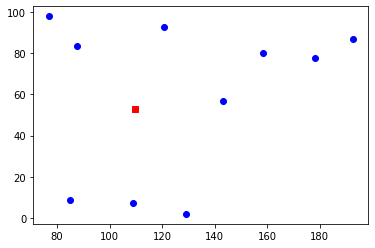

In [28]:
#Set random seed
rnd = np.random
rnd.seed(0)



#A = [(i,j) for i in V for j in V if i != j]
#c = {(i,j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i,j in A}
#Q = 20
#q = {i: rnd.randint(1,10) for i in N}

plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c = 'b')


In [40]:
from gurobipy import Model, GRB, quicksum
mdl = Model("CVRP")
#sets
K = [i for i in range(1,n+1)] #Products
T = [i for i in range(1,n+1)] #Periods
L = [i for i in range(1,n+1)] #Vendor
R = [i for i in range(1,n+1)] # Menge der Rabattstufen


#Parameter
p_k = np.round(rnd.rand(len(K)), 2) 
#setupcost
sc_N_k = np.round(rnd.rand(len(K)), 2) 
sc_RF_k = np.round(rnd.rand(len(K)), 2) 
#storage cost
l_N_k = np.round(rnd.rand(len(K)), 2) 
l_R_k = np.round(rnd.rand(len(K)), 2) 
l_M = np.round(rnd.rand(len(K)), 2) 
#substitution cost
c_sub = 0
#ordering cost
oc_fix_lr = [[round(random.random()*10,2) for i in range(len(L))] for j in range(len(R))]
oc_var_lr = [[round(random.random(),2) for i in range(len(L))] for j in range(len(R))]
#trash/disposal cost
tc = 0

In [41]:
oc_fix_lr

[[3.06, 5.76, 1.58, 9.35, 9.48, 0.54, 2.76, 2.89, 2.82, 3.65],
 [2.89, 0.28, 9.81, 6.91, 0.59, 3.78, 2.8, 9.64, 7.26, 6.99],
 [0.23, 4.09, 3.06, 3.53, 2.52, 0.53, 9.51, 2.0, 5.2, 8.29],
 [8.1, 8.44, 6.98, 7.47, 3.78, 0.64, 8.77, 2.9, 4.87, 2.12],
 [7.49, 6.5, 2.75, 4.85, 5.22, 2.23, 9.99, 6.54, 0.39, 6.52],
 [6.19, 3.86, 1.76, 9.44, 8.24, 9.03, 8.07, 8.1, 2.69, 4.54],
 [0.37, 5.37, 1.93, 8.84, 9.58, 6.15, 2.64, 1.93, 8.62, 9.81],
 [3.02, 7.86, 6.34, 6.49, 7.71, 5.01, 3.87, 7.15, 5.34, 8.47],
 [9.67, 7.36, 3.15, 4.14, 9.92, 6.41, 8.84, 1.68, 5.7, 9.17],
 [4.95, 6.08, 1.04, 0.9, 1.13, 4.79, 1.95, 1.07, 1.37, 9.08]]

In [42]:
oc_var_lr

[[0.62, 0.8, 0.87, 0.34, 0.67, 0.53, 0.74, 0.91, 0.32, 0.81],
 [0.6, 0.2, 0.1, 0.97, 0.0, 0.65, 0.83, 0.62, 0.44, 0.91],
 [0.75, 1.0, 0.86, 0.72, 0.84, 0.98, 0.26, 0.39, 0.65, 0.26],
 [0.83, 0.46, 0.16, 0.86, 0.75, 0.68, 0.08, 0.33, 0.84, 0.25],
 [0.48, 0.46, 0.75, 0.63, 0.46, 0.44, 0.41, 0.33, 0.62, 0.37],
 [0.62, 0.92, 0.26, 0.13, 0.03, 0.67, 0.7, 0.01, 0.63, 0.47],
 [0.42, 0.27, 0.65, 0.35, 0.19, 0.44, 0.04, 0.92, 0.03, 0.33],
 [0.03, 0.67, 1.0, 0.95, 0.6, 0.54, 0.91, 0.16, 0.99, 0.98],
 [0.03, 0.59, 0.81, 0.86, 0.48, 0.46, 0.05, 0.25, 0.98, 0.53],
 [0.54, 0.8, 0.85, 0.83, 0.58, 0.97, 0.47, 0.55, 0.79, 0.37]]

In [22]:
#Variablen
X_N_kt = 0
X_RF_kt = 0

#setup-variables
gamma_N_kt = mdl.addVars(A, vtype=GRB.BINARY)
gamme_RF_kt = mdl.addVars(A, vtype=GRB.BINARY)

#Storage-quantity
Y_N_kt = mdl.addVars(N, vtype=GRB.CONTINUOUS) # new goods
Y_RF_kt = mdl.addVars(N, vtype=GRB.CONTINUOUS) #remanufactured goods
Y_M_t = mdl.addVars(N, vtype=GRB.CONTINUOUS) #raw material

#Substitution quantity
S_kt = mdl.addVars(N, vtype=GRB.CONTINUOUS)
#disposal quantity
A_t = mdl.addVars(N, vtype=GRB.CONTINUOUS)

x = mdl.addVars(A, vtype=GRB.BINARY)
u = mdl.addVars(N, vtype=GRB.CONTINUOUS)

\begin{align}
	Min. Z= \sum_{k \epsilon K} \sum_{t \epsilon T} ( p_{k} [\, X_{kt}^N + X_{kt}^{RF}] \,  +   sc_{k}^{N} \, \gamma_{kt}^{N} + sc_{k}^{RF} \, \gamma_{kt}^{RF} ) \notag\\ + \sum_{k \epsilon K} \sum_{t \epsilon T} l^{N}_{k} \, Y_{kt}^{N} +l^{RF}_{k} \, Y_{kt}^{RF}  + l^{R}_{k}  \, Y_{kt}^{R}  + c^{sub} S_{kt})  
	+ \sum_{t \epsilon T}( l^M \, 
	Y_t^M + tc \, A_t) \notag\\ + \sum_{l \epsilon L} \sum_{r \epsilon R} \sum_{t \epsilon T}(  \beta_{lrt} \, oc_{lr}^{fix} +  B_{lrt} \, oc_{lr}^{var}) 
		\label{Eq:ZFkt}
\end{align}

\begin{align}
	& Y^{R}_{k,t-1} + re_{kt} - X^{RF}_{kt} - A_t = Y^{R}_{kt} \, & & \forall \, k \in \mathcal{K},\,t \in \mathcal{T} &\hfill \label{Lagerbilanz_Rücklauf}\\[2ex]
\end{align}

\begin{align}
	\hspace{12pt}&Y^{M}_{t-1} + \sum_{l \in \mathcal{L}} \sum_{r \in \mathcal{R}} B_{l,r,t} - \sum_{k \in \mathcal{K}} (mb^{N}_{k} \cdot X^{N}_{kt} + mb^{RF}_{k} \cdot X^{RF}_{kt}) = Y^{M}_{t} \,& &\forall \, t \in \mathcal{T} &\hfill \label{Eq:Lagerbilanz_Material}\\[2ex]
\end{align}

\begin{align}
	Y^{R}_{k,t-1} + re_{kt} - X^{RF}_{kt} - A_t = Y^{R}_{kt} \, & & \forall \, k \in \mathcal{K},\,t \in \mathcal{T} &\hfill \label{Lagerbilanz_Rücklauf}\\[2ex]
\end{align}

\begin{align}
	Y^{N}_{k,t-1}  + X^{N}_{kt} - d_{kt}^N - S_{kt} = Y^{N}_{kt} \, & & \forall \, k \in \mathcal{K} ,t \in \mathcal{T} &\hfill \label{Eq:Lagerbilanz_Neuproduktion}\\[2ex]
\end{align}

\begin{align}
	&Y^{RF}_{k,t-1}  + X^{RF}_{kt} - d_{kt}^{RF} + S_{kt} = Y^{RF}_{kt} \, & & \forall \, k \in \mathcal{K} ,t \in \mathcal{T} &\hfill \label{Eq:Lagerbilanz_Refabrikate}\\[2ex]
\end{align}

\begin{align}
		\sum_{k \in \mathcal{K}}( st^{N}_{k} \cdot \gamma^{N}_{kt}  + pt^N \cdot X^N_{kt}) \leq c^{N}  \, & & \forall \, t \in \mathcal{T} &\hfill \label{Eq:Kapa_Neuproduktion}\\[2ex]
\end{align}

\begin{align}
		\sum_{k \in \mathcal{K}}( st^{RF}_{k} \cdot \gamma^{RF}_{kt}  + pt^{RF} \cdot X^{RF}_{kt}) \leq c^{RF}  \, & & \forall \, t \in \mathcal{T} &\hfill \label{Eq:Kapa_Refabrikation}\\[2ex]
\end{align}

\begin{align}
		X^N_{kt} \leq bigM_{kt}^{N} \cdot \gamma^{N}_{kt}  \;\;\;( BigM^N_{kt} = \sum_{t^{'}=t}^T d_{k,t^{'}}^N )\, & & \forall \,k \in \mathcal{K}\,, t \in \mathcal{T} &\hfill \label{Eq:bigM_Neuproduktion}\\[2ex]
\end{align}

\begin{align}
		X^{RF}_{kt} \leq bigM_{kt}^{RF}  \cdot \gamma^{RF}_{kt} \;\;\; (BigM^{RF}_{kt} = \sum_{t^{'}=t}^T d_{k,t^{'}}^{RF} )\, & & \forall \, k \in \mathcal{K}\,, t \in \mathcal{T} &\hfill \label{Eq:bigM_Refabrikation}\\[2ex]
\end{align}

\begin{align}
		\sum_{k \in \mathcal{K}}  (e^{N} \cdot X^{N}_{kt}  + e^{RF} \cdot X^{RF}_{kt}) \leq e^{max} \,\,\, \forall \, t \in \mathcal{T}  \, & &  &\hfill \label{Eq:Emission}\\[2ex]
\end{align}

\begin{align}
		\sum_{k \in \mathcal{K}} \sum_{t \in \mathcal{T}} e^{N} \cdot X^{N}_{kt}  + e^{RF} \cdot X^{RF}_{kt} \leq e^{max} \cdot \mathcal{T} \, & &  &\hfill \label{Eq:Emission}\\[2ex]
\end{align}

\begin{align}
    B_{lrt} \leq \beta_{lrt} \cdot oq^{max}_{lr}    \, & & \forall \, t,l,r \in \mathcal{T,L,R} &\hfill \label{Eq:Bestell-UB}\\[2ex]
\end{align}

\begin{align}
B_{lrt} \geq \beta_{lrt} \cdot(1+ oq^{max}_{lr-1})    \, & & \forall \,t,l,r \in \mathcal{T,L,R} &\hfill \label{Eq:Bestell-LB}\\[2ex]
\end{align}

\begin{align}
\sum_{r \in \mathcal{R}} \beta_{lrt}  \leq 1   \, & & \forall \, l \in \mathcal{L}\,, t \in \mathcal{T}  &\hfill \label{Eq:Bestell-nur-über-eine-Rabattstufe}\\[2ex]
\end{align}

\begin{align}
    A_t, B_{lrt} , X^{N}_{kt} , X^{RF}_{kt} , Y^{M}_{t} ,  Y^{N}_{kt} , Y^{RF}_{kt} ,  Y^{R}_{kt} \geq 0  \, & & \forall \, t \in \mathcal{T} &\hfill \label{Eq:NNB}\\[2ex]
\end{align}

\begin{align}
    \beta_{lrt} ,  \gamma^{N}_{kt} , 	\gamma^{RF}_{kt} \in \lbrace 0,1 \rbrace	  \, & & \forall \, t \in \mathcal{T} &\hfill \label{Eq:Binär}
\end{align}